In [46]:
import pandas as pd;
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt;

file_data = pd.read_csv('data.csv')
file_data.info()
file_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
file_data = file_data.drop(["id"], axis=1)
file_data = file_data.drop(["Unnamed: 32"], axis=1)
file_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
file_data.shape

(569, 31)

In [49]:
file_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


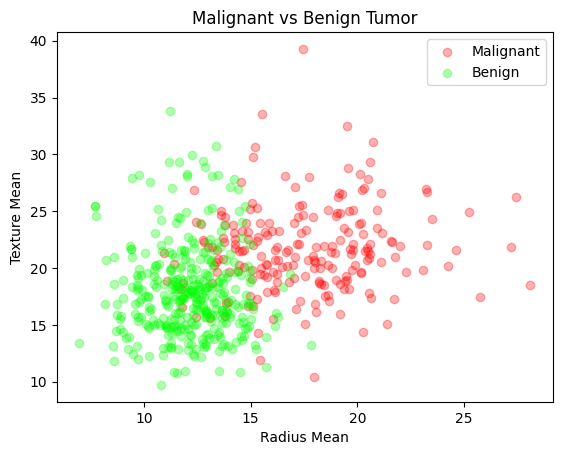

In [50]:
M = file_data[file_data.diagnosis == "M"]
B = file_data[file_data.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [51]:
file_data.diagnosis = [1 if i == "M" else 0 for i in file_data.diagnosis]
file_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [65]:
x = file_data.drop(["diagnosis"], axis = 1)
y = file_data.diagnosis.values

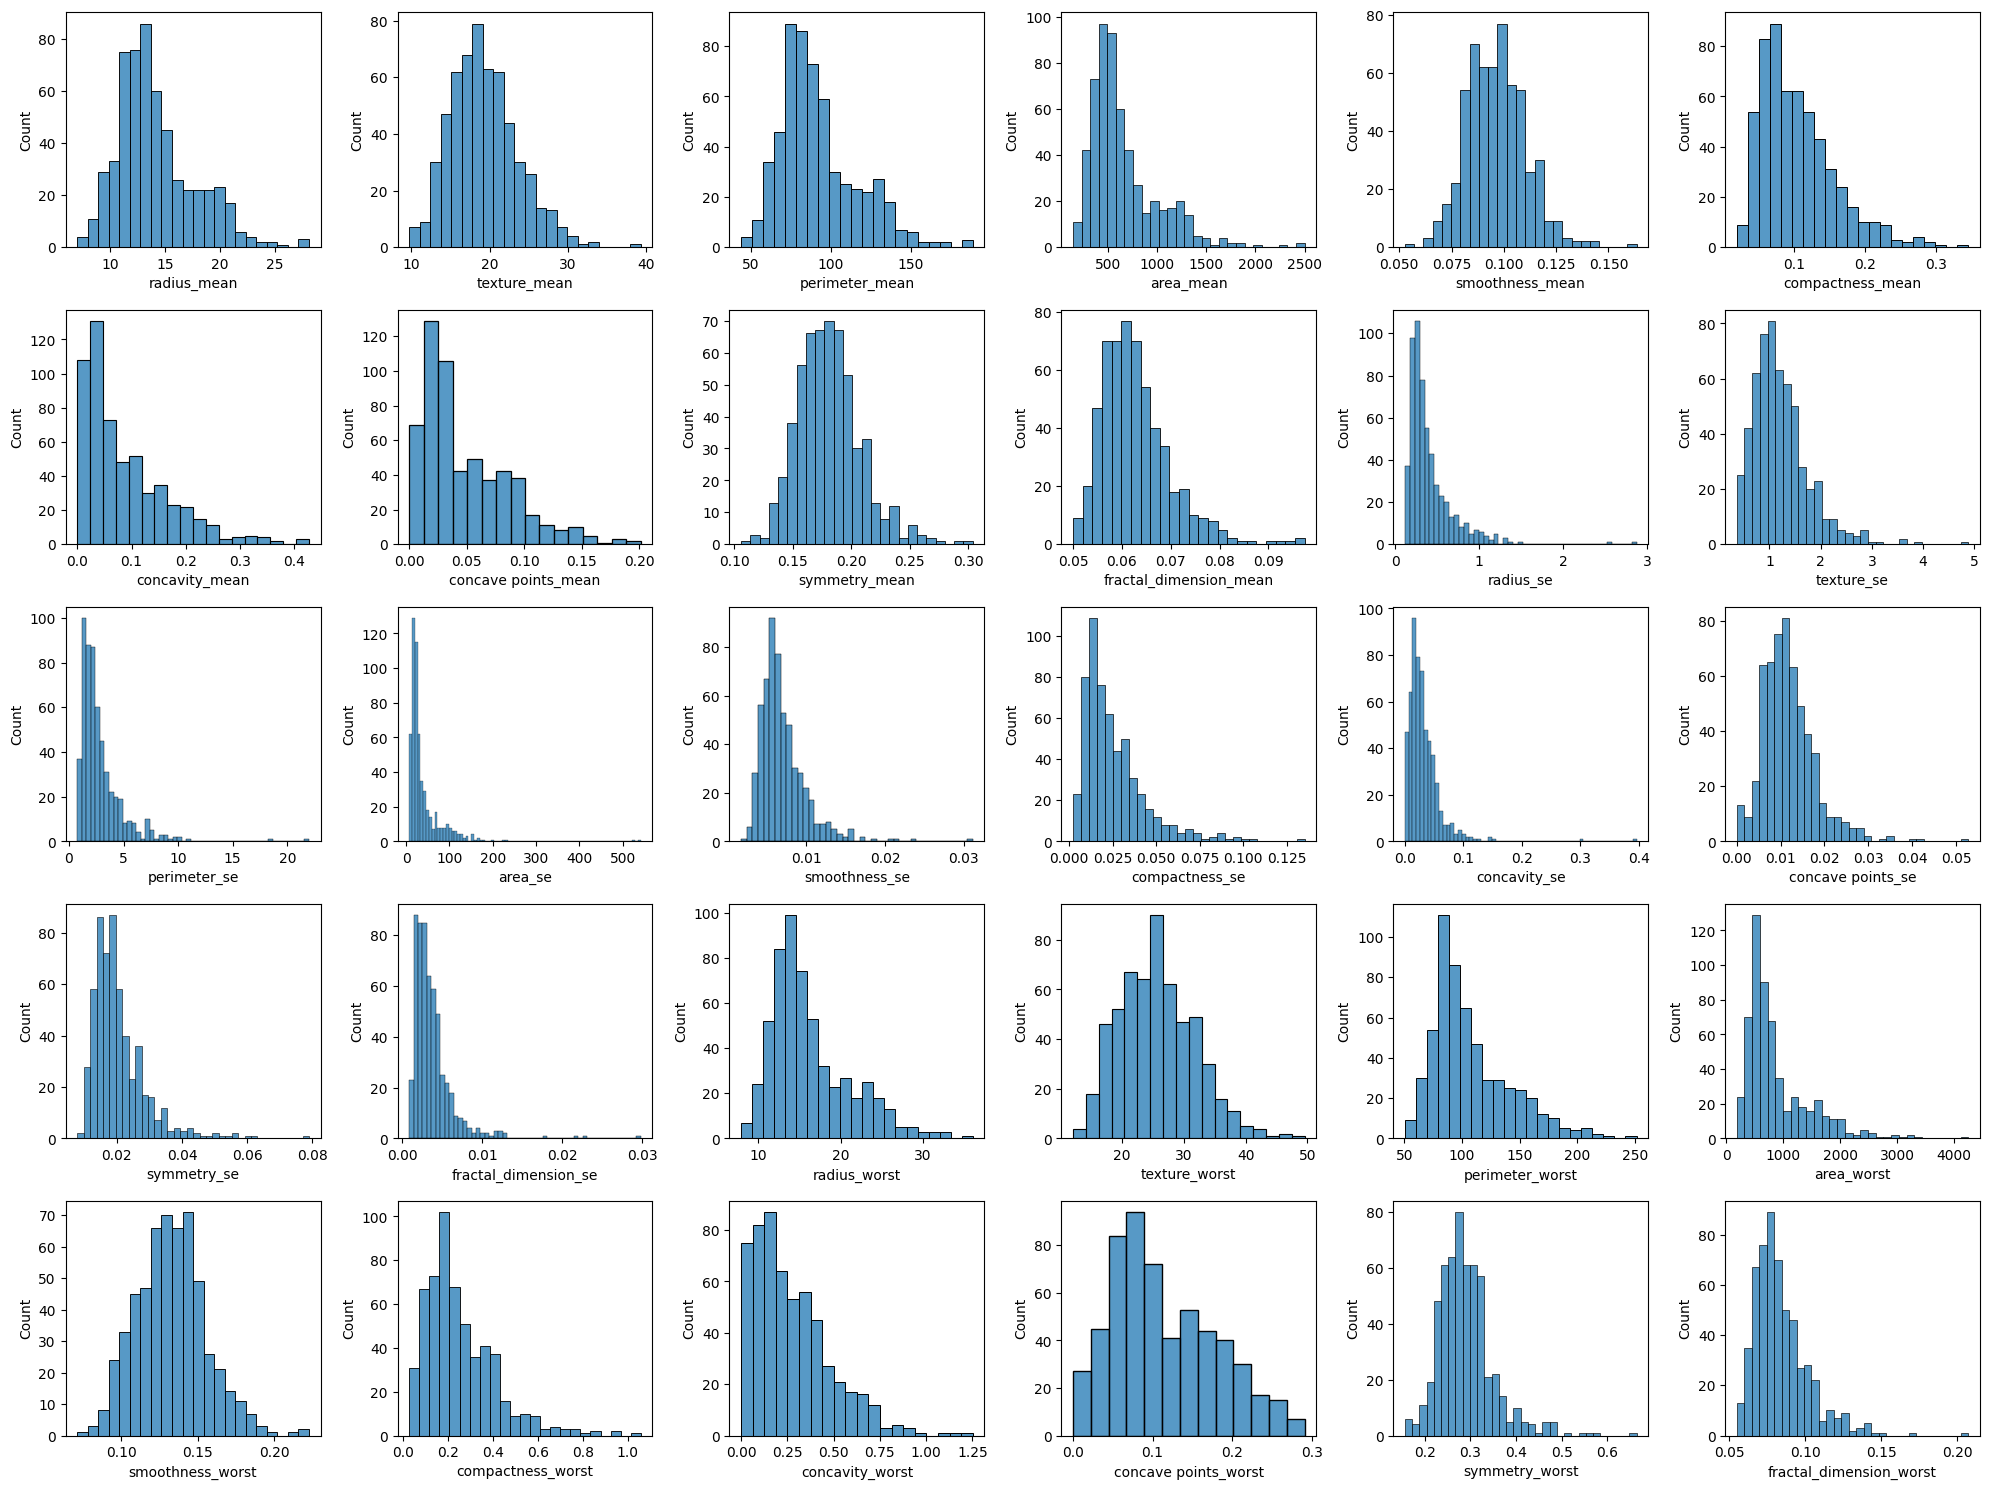

In [66]:
import seaborn as sns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in x:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(x[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [67]:
# dropping some features that after data discovery and analysis I think they won't impact models as much
x = x.drop(['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','fractal_dimension_mean', 
            'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','fractal_dimension_se', 
            'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst','fractal_dimension_worst' ], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   texture_mean          569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   symmetry_mean         569 non-null    float64
 5   radius_se             569 non-null    float64
 6   texture_se            569 non-null    float64
 7   perimeter_se          569 non-null    float64
 8   area_se               569 non-null    float64
 9   smoothness_se         569 non-null    float64
 10  compactness_se        569 non-null    float64
 11  concavity_se          569 non-null    float64
 12  concave points_se     569 non-null    float64
 13  symmetry_se           569 non-null    float64
 14  fractal_dimension_se  569 non-null    float64
 15  radius_worst          5

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 33)
print("Train dataset shape: ", x_train.shape )
print("Test dataset shape: ", x_test.shape )


Train dataset shape:  (426, 20)
Test dataset shape:  (143, 20)


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=123)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9230769230769231

[Text(0.5119047619047619, 0.9285714285714286, 'x[17] <= 105.95\nentropy = 0.951\nsamples = 426\nvalue = [268, 158]'),
 Text(0.23809523809523808, 0.7857142857142857, 'x[16] <= 26.36\nentropy = 0.269\nsamples = 261\nvalue = [249, 12]'),
 Text(0.19047619047619047, 0.6428571428571429, 'entropy = 0.0\nsamples = 183\nvalue = [183, 0]'),
 Text(0.2857142857142857, 0.6428571428571429, 'x[4] <= 0.209\nentropy = 0.619\nsamples = 78\nvalue = [66, 12]'),
 Text(0.23809523809523808, 0.5, 'x[18] <= 650.95\nentropy = 0.456\nsamples = 73\nvalue = [66, 7]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[13] <= 0.014\nentropy = 0.131\nsamples = 55\nvalue = [54, 1]'),
 Text(0.09523809523809523, 0.21428571428571427, 'x[4] <= 0.176\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.047619047619047616, 0.07142857142857142, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14285714285714285, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.2142857

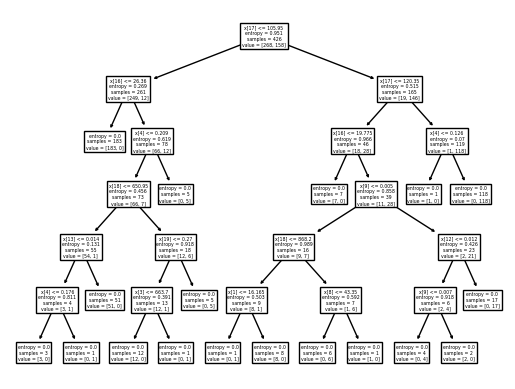

In [70]:
from sklearn import tree

tree.plot_tree(dt)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9230769230769231

In [72]:
knn_a = KNeighborsClassifier(n_neighbors = 3)
knn_a.fit(x_train, y_train)
knn_a.score(x_test, y_test)

0.9020979020979021

In [73]:
knn_b = KNeighborsClassifier(n_neighbors = 1)
knn_b.fit(x_train, y_train)
knn_b.score(x_test, y_test)

0.8881118881118881

In [74]:
knn_c = KNeighborsClassifier(n_neighbors = 7)
knn_c.fit(x_train, y_train)
knn_c.score(x_test, y_test)

0.9230769230769231

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss = 'log_loss')
gbc.fit(x_train, y_train)
gbc.score(x_test, y_test)

0.9790209790209791

In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(loss='log_loss')
hgbc.fit(x_train, y_train)
hgbc.score(x_test, y_test)


0.9790209790209791

In [77]:
from sklearn.neural_network import MLPClassifier

nnmlp = MLPClassifier(hidden_layer_sizes=(20,), solver='lbfgs', random_state=1, activation='logistic')
nnmlp.fit(x_train, y_train)
nnmlp.score(x_test, y_test)

c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9090909090909091